In [19]:
# STEP 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Optional: Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [22]:
df = pd.read_csv("C:\\Users\\Tanya Singh\\Desktop\\code_soft\\task2\\fraudTest.csv")
  # Make sure it's in your working directory

# Quick look
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (555719, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
is_fraud
0    553574
1      2145
Name: count, dtype: int64


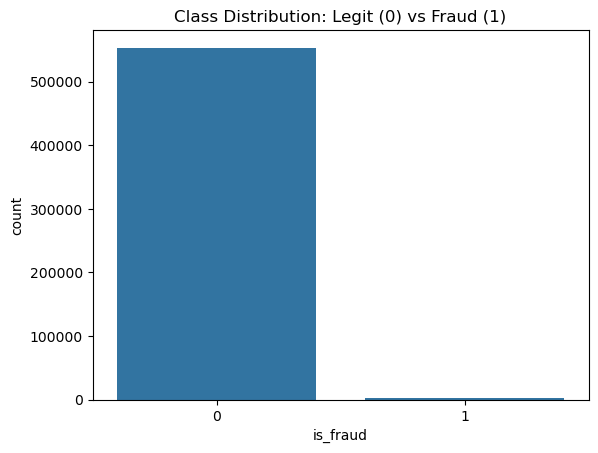

In [38]:
# Check for missing values
print(df.isnull().sum())

# Check class distribution
print(df['is_fraud'].value_counts())


# Plot class imbalance
sns.countplot(x='is_fraud', data=df)

plt.title("Class Distribution: Legit (0) vs Fraud (1)")
plt.show()


In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Drop the target column
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Keep only numeric columns
X_numeric = X.select_dtypes(include=['int64', 'float64'])

# Scale the numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [64]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)


In [66]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)


In [55]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.00      0.00      0.00       429

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144



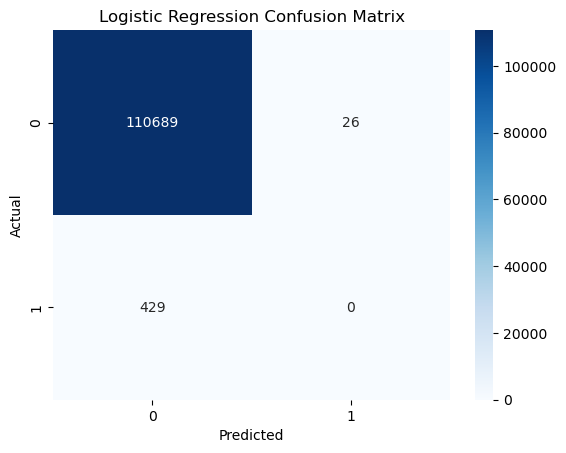


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       0.54      0.19      0.28       429

    accuracy                           1.00    111144
   macro avg       0.77      0.59      0.64    111144
weighted avg       1.00      1.00      1.00    111144



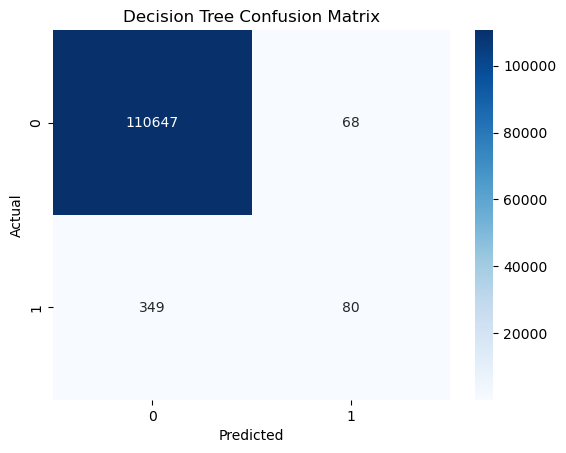


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110715
           1       1.00      0.01      0.02       429

    accuracy                           1.00    111144
   macro avg       1.00      0.50      0.51    111144
weighted avg       1.00      1.00      0.99    111144



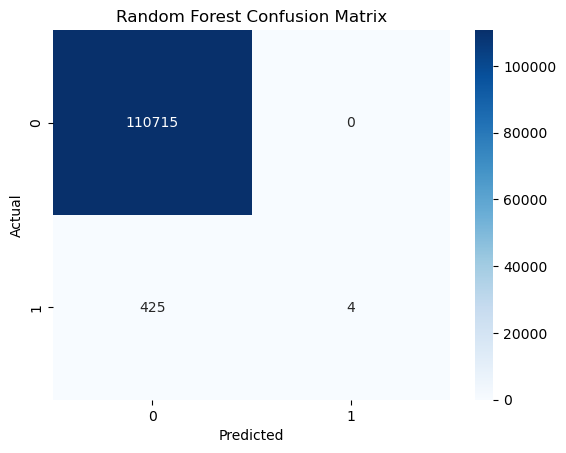

In [56]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Classification Report:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate all
evaluate_model("Logistic Regression", y_test, lr_pred)
evaluate_model("Decision Tree", y_test, dt_pred)
evaluate_model("Random Forest", y_test, rf_pred)
